# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_15_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,IL25,LANCL1-AS1,LEMD1,PCMT1,RP11-120J4.1,RP11-374M1.2,SDR42E1,TARBP2,TRIM43B,VN2R17P
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.08036,21.39991,22.39503,31.44953,21.4144,21.24656,30.26124,29.60417,21.9744,21.12857
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.08036,21.39991,22.39503,33.02746,21.4144,21.24656,29.12730,29.61188,21.9744,21.12857
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.08036,21.39991,22.39503,33.75531,21.4144,21.24656,27.22907,31.90343,21.9744,21.12857
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.08036,21.39991,29.70759,33.50304,21.4144,21.24656,22.83731,30.35424,21.9744,21.12857
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.08036,21.39991,22.39503,33.18274,21.4144,21.24656,22.83731,31.60946,21.9744,21.12857


In [3]:
X = data[['DLGAP4', 'EIF4A1P9', 'FAM172BP', 'GJA9', 'GPR155', 'IL25', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-374M1.2', 'SDR42E1', 'TARBP2', 'TRIM43B', 'VN2R17P']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(2)# If PFS is over 3 months, I will consider it as Responder (R)


print(X)
print('Numero de pacientes: ',len(Y))

       DLGAP4  EIF4A1P9  FAM172BP      GJA9    GPR155      IL25  LANCL1-AS1  \
0    34.54982  21.37925  21.62929  29.68286  31.81161  21.08036    21.39991   
1    34.06647  21.37925  21.62929  26.80539  31.42781  21.08036    21.39991   
2    34.42561  25.08766  29.29206  30.09292  30.47292  21.08036    21.39991   
3    34.41176  26.76156  21.62929  29.29223  30.72903  21.08036    21.39991   
4    34.29088  21.37925  21.62929  32.00382  31.16114  21.08036    21.39991   
..        ...       ...       ...       ...       ...       ...         ...   
176  34.55658  21.78113  21.49653  28.18967  29.90347  21.43715    21.10533   
177  33.15506  21.78113  21.49653  28.18967  31.66030  21.43715    21.10533   
178  34.68047  21.78113  25.64475  28.18967  31.92039  21.43715    21.10533   
179  35.60014  21.78113  21.49653  33.92530  32.78760  21.43715    21.10533   
180  35.23053  21.78113  21.49653  28.18967  30.59097  21.43715    21.10533   

        LEMD1     PCMT1  RP11-120J4.1  RP11-374M1.2

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [28]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [29]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(max_depth=2, n_estimators=20, random_state=125)

In [30]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5559113300492611


### 5. Prediction

In [31]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [32]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [33]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset: 0.6666666666666666
Final accuracy on the testing dataset: 0.4864864864864865


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  0  0]
 [ 0 25  0]
 [ 0  0 52]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        52

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[13  1  4]
 [ 2  0  4]
 [ 7  1  5]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 2 0 0 0 2 2 0 0 1 0 1 0 0 0 2 2 2 0 0 0 0 2 2 0 2 0 2 2 0 2 0 0 0 2 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        18
           1       0.00      0.00      0.00         6
           2       0.38      0.38      0.38        13

    accuracy                           0.49        37
   macro avg       0.33      0.37      0.34        37
weighted avg       0.42      0.49      0.45        37



Features with relevance over 0:  15
Features with relevance over 0.04:  10


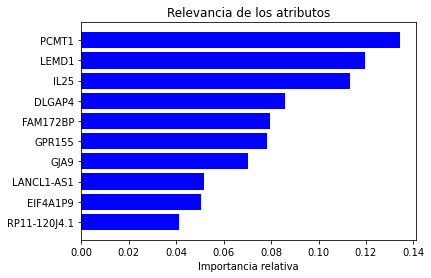

DLGAP4 = 0.08570233022906822
EIF4A1P9 = 0.039160141238317715
FAM172BP = 0.05031223265847039
GJA9 = 0.0795841138589741
GPR155 = 0.07039283315997424
IL25 = 0.03838585866910812
LANCL1-AS1 = 0.023599361412746326
LEMD1 = 0.0784013317508306
PCMT1 = 0.11318201972989456
RP11-120J4.1 = 0.05186516877825765
RP11-374M1.2 = 0.03933446511226071
SDR42E1 = 0.11976625817626106
TARBP2 = 0.13435712376036235
TRIM43B = 0.041337928999423165
VN2R17P = 0.034618832466050874


In [15]:
# Mediante el modelo creado podemos ver qué atributos son los más significativos para toamr una decisión.
# Los atributos conmyor relevancia serán los que estén colocados en la cima del árbol.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.04), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.04: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)
# Los atributos que cuya relevancia es 0, no serán necesarios para realizar la predicción del target.